In [334]:
titration_volumes = []
for i in range(0,50+1):
    titration_volumes.append(round(i*0.001,4))
print(titration_volumes)

[0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018, 0.019, 0.02, 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027, 0.028, 0.029, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035, 0.036, 0.037, 0.038, 0.039, 0.04, 0.041, 0.042, 0.043, 0.044, 0.045, 0.046, 0.047, 0.048, 0.049, 0.05]


The titration values

In [335]:
Ka = 1e-5
Kb = 1e-14/Ka
C1 = 1
C2 = 1
V = 0.025

C1 Acid Conc in moldm-3
C2 Base Conc in moldm-3
V initial acid volume in dm3

In [336]:
def get_acid_salt(v):
    mol1 = V*C1
    mol2 = v*C2
    total_v = v+V
    if mol1 > mol2:
        return [(mol1-mol2)/total_v,mol2/total_v]
    return [-(mol2-mol1)/total_v,mol1/total_v]

When given base volume calculates the remaining acid and base conc

In [337]:
acid_salt_conc = []
for i in titration_volumes:
    acid_salt_conc.append(get_acid_salt(i))
    print(i," -> ", round(get_acid_salt(i)[0],4), " | ",round(get_acid_salt(i)[1],4))

0.0  ->  2.0  |  0.0
0.001  ->  1.8846  |  0.0385
0.002  ->  1.7778  |  0.0741
0.003  ->  1.6786  |  0.1071
0.004  ->  1.5862  |  0.1379
0.005  ->  1.5  |  0.1667
0.006  ->  1.4194  |  0.1935
0.007  ->  1.3438  |  0.2188
0.008  ->  1.2727  |  0.2424
0.009  ->  1.2059  |  0.2647
0.01  ->  1.1429  |  0.2857
0.011  ->  1.0833  |  0.3056
0.012  ->  1.027  |  0.3243
0.013  ->  0.9737  |  0.3421
0.014  ->  0.9231  |  0.359
0.015  ->  0.875  |  0.375
0.016  ->  0.8293  |  0.3902
0.017  ->  0.7857  |  0.4048
0.018  ->  0.7442  |  0.4186
0.019  ->  0.7045  |  0.4318
0.02  ->  0.6667  |  0.4444
0.021  ->  0.6304  |  0.4565
0.022  ->  0.5957  |  0.4681
0.023  ->  0.5625  |  0.4792
0.024  ->  0.5306  |  0.4898
0.025  ->  0.5  |  0.5
0.026  ->  0.4706  |  0.5098
0.027  ->  0.4423  |  0.5192
0.028  ->  0.4151  |  0.5283
0.029  ->  0.3889  |  0.537
0.03  ->  0.3636  |  0.5455
0.031  ->  0.3393  |  0.5536
0.032  ->  0.3158  |  0.5614
0.033  ->  0.2931  |  0.569
0.034  ->  0.2712  |  0.5763
0.035  ->  

In [338]:
def solve_x(a,b,c):
    return (pow((pow(b,2)-4*a*c),0.5)-b)/2*a

Solves a polynomial equation

In [339]:
import math
def calc_pH(conc):
    return -1*math.log(conc,10)
    
def calc_pOH(conc):
    return -1*math.log(conc,10)

Calculates by the concentration

In [340]:
pH_values = []
for concs in acid_salt_conc:
    if(concs[0] > 0):
        h_conc = solve_x(1,(concs[1]+Ka),-Ka*concs[0])
        print(h_conc)
        pH_values.append(calc_pH(h_conc))
    else:
        oh_conc = solve_x(1,(-1*concs[0])+Kb,-Kb*concs[1])+(-1*concs[0])
        print(oh_conc)
        pH_values.append(14-calc_pOH(oh_conc))


0.004467138750083678
0.00048378887141860977
0.00023919531425469626
0.0001564236956445239
0.00011489596219731169
8.994606147247342e-05
7.330178479091065e-05
6.14085252926555e-05
5.248647126068762e-05
4.5545998163365464e-05
3.99930022041417e-05
3.5449272620780015e-05
3.166259929926474e-05
2.8458339269399335e-05
2.5711727842936405e-05
2.3331259572628715e-05
2.1248298568726787e-05
1.9410354332560775e-05
1.7776598207924765e-05
1.6314795257793557e-05
1.4999156325939955e-05
1.3808803644266288e-05
1.2726654817662997e-05
1.173859788383691e-05
1.0832872570282204e-05
9.999600024013233e-06
9.230421048112003e-06
8.518214718866712e-06
7.856877290657316e-06
7.241146839087609e-06
6.666462971705034e-06
6.128853687836777e-06
5.6248434507355505e-06
5.151377971912563e-06
4.705762267409597e-06
4.285609332799201e-06
3.888797370732444e-06
3.513433954882572e-06
3.157825851141105e-06
2.8204534818776494e-06
2.499949219969544e-06
2.1950788594016224e-06
1.904725732360113e-06
1.627877042886805e-06
1.36361206376500

In [341]:
for i in pH_values:
    print(i)

2.349970558058746
3.315344125922622
3.62124733226415
3.8056974577456617
3.9396952335070115
4.046017848641054
4.134885450796699
4.211771331944525
4.2799526244794635
4.341549775703453
4.398015992921928
4.450392671624
4.499453435178336
4.545790447441478
4.589868737536878
4.632061814542039
4.672675839815865
4.711966536570868
4.750151343527565
4.7874183720120795
4.823933168497208
4.859843945838454
4.8952857350066425
4.930383774270521
4.965256365535202
5.000017371083797
5.0347784880639015
5.069651416851648
5.104750029648355
5.1401926456199885
5.17610452879808
5.212620746297356
5.249889560225987
5.288076583473398
5.327370016930525
5.3679874208682605
5.4101846855656825
5.454268205866521
5.500611824287792
5.549681058757394
5.602068812812361
5.658549872876177
5.720167550958379
5.788378401420045
5.865309165258196
5.954250015684108
6.060705126420603
6.194983680826958
6.38021812173828
6.690202772514673
9.411945960395682


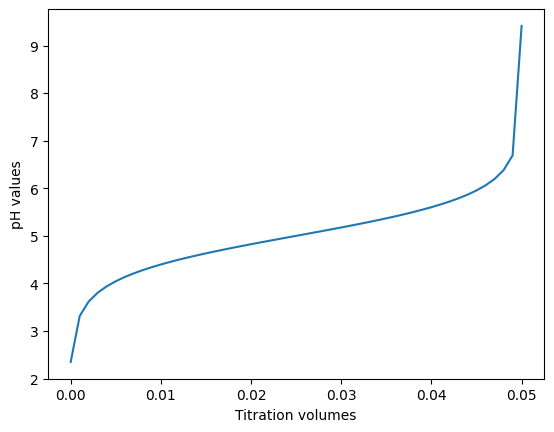

In [342]:
import matplotlib.pyplot as plt
# plt.plot(titration_volumes, pH_values)
plt.plot(titration_volumes, pH_values)
plt.xlabel('Titration volumes')
plt.ylabel('pH values')
plt.show()